In [2]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale, normalize
import time

db = MongoClient('lattice-101', 27018)
collection = 'svi_county_GISJOIN'
cursor = db.sustaindb[collection].find()
df = pd.DataFrame(list(cursor))
df

,_id,ST,STATE,ST_ABBR,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_UNINSUR,M_UNINSUR,EP_UNINSUR,MP_UNINSUR,E_DAYPOP,GISJOIN
0,5f8e1db67a69f0e0c824fa15,8,COLORADO,CO,Elbert,08039,"Elbert County, Colorado",1850.835533,25162,0,...,0,0,0,0,1451,386,5.8,1.5,12940,G0800390
1,5f8e1db77a69f0e0c82501d4,49,UTAH,UT,Morgan,49029,"Morgan County, Utah",609.168335,11391,0,...,0,0,0,1,696,230,6.1,2.0,7625,G4900290
2,5f8e1db67a69f0e0c824fa21,8,COLORADO,CO,Park,08093,"Park County, Colorado",2193.901611,17392,0,...,0,0,0,0,1256,341,7.3,2.0,9184,G0800930
3,5f8e1db67a69f0e0c824fc99,31,NEBRASKA,NE,Keya Paha,31103,"Keya Paha County, Nebraska",773.075651,792,104,...,0,0,0,0,41,24,5.2,3.0,301,G3101030
4,5f8e1db77a69f0e0c825017d,46,SOUTH DAKOTA,SD,Hanson,46061,"Hanson County, South Dakota",434.586521,3397,0,...,0,0,0,1,193,58,5.7,1.7,1993,G4600610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,5f8e1dbb7a69f0e0c82505f9,35,NEW MEXICO,NM,Cibola,35006,"Cibola County, New Mexico",4539.982366,26978,0,...,0,0,2,8,2836,388,11.1,1.5,23864,G3500060
3136,5f8e1dbb7a69f0e0c8250620,48,TEXAS,TX,Zavala,48507,"Zavala County, Texas",1297.406535,12131,0,...,1,0,2,10,2194,354,18.4,3.0,10672,G4805070
3137,5f8e1dbb7a69f0e0c82505fa,35,NEW MEXICO,NM,Luna,35029,"Luna County, New Mexico",2965.242038,24264,0,...,1,0,2,8,2352,466,9.8,1.9,23187,G3500290
3138,5f8e1dbb7a69f0e0c825061f,48,TEXAS,TX,Duval,48131,"Duval County, Texas",1793.476183,11355,0,...,1,0,2,10,2656,406,24.5,3.7,9592,G4801310


In [3]:
features = [
   
]


total = df.shape[0]
print(f'total: {total}')

_5_percent = int(total * 0.05)
print(f'_5_percent: {_5_percent}')

_10_percent = total * 0.1
_25_percent = total * 0.25
_50_percent = total * 0.5

print(f'#features:{len(features)}')

x = df.loc[0:_50_percent, features]
print(f'x.shape[0]: {x.shape[0]}')

# y = df.loc[:, 'RPL_THEMES']

x.loc[:,:] = normalize(x)

total: 3140
_5_percent: 157
#features:34
x.shape[0]: 1571


In [15]:
# df.loc[:,:] = StandardScaler().fit_transform(df)

In [16]:
total_variance = x.var().sum()
total_variance

0.21080699938666125

In [17]:
#top 10 features with variance
feature_var = (x.var()/x.var().sum()).sort_values(ascending=False)
feature_var

E_PCI       0.412529
E_HU        0.188868
E_HH        0.150421
E_MINRTY    0.097841
E_AGE17     0.058680
E_AGE65     0.028207
E_DISABL    0.017376
E_POV       0.015795
M_PCI       0.010007
E_NOHSDP    0.005233
E_MUNIT     0.004557
E_GROUPQ    0.003402
E_MOBILE    0.002868
E_SNGPNT    0.001095
E_LIMENG    0.000934
E_NOVEH     0.000825
E_UNEMP     0.000804
M_POV       0.000145
E_CROWD     0.000105
M_DISABL    0.000060
M_GROUPQ    0.000039
M_NOHSDP    0.000038
M_HH        0.000032
M_MOBILE    0.000027
M_MINRTY    0.000018
M_MUNIT     0.000017
M_UNEMP     0.000015
M_SNGPNT    0.000014
M_HU        0.000012
M_NOVEH     0.000010
M_LIMENG    0.000009
M_AGE17     0.000007
M_AGE65     0.000005
M_CROWD     0.000004
dtype: float64

In [18]:
from sklearn.decomposition import PCA

start_time = time.monotonic()

pca = PCA(n_components=len(features), random_state=2021)

# principalComponents = pca.fit_transform(x)
x_pca_34 = pca.fit_transform(x)

print('seconds: ',(time.monotonic() - start_time))

print(f'Variance explained by all 34 PCs = {pca.explained_variance_ratio_}')
print(len(pca.explained_variance_ratio_))

seconds:  0.034000740000919905
Variance explained by all 34 PCs = [8.68636355e-01 7.76164450e-02 1.86626646e-02 1.12396575e-02
 5.86209016e-03 4.98186122e-03 3.73956841e-03 3.00553583e-03
 1.74176487e-03 1.22845632e-03 1.04447520e-03 8.55565279e-04
 7.03025907e-04 1.96778642e-04 1.73173690e-04 8.47928642e-05
 7.99849510e-05 4.25573708e-05 2.78863808e-05 2.32284321e-05
 1.38532127e-05 7.93052784e-06 5.69602776e-06 5.02685360e-06
 4.54418942e-06 3.87426250e-06 2.86674169e-06 2.38222206e-06
 2.03033385e-06 1.65788351e-06 1.48183357e-06 1.19374688e-06
 9.48419732e-07 6.46549283e-07]
34


In [19]:
pcs = pd.DataFrame(pca.components_,columns=features, 
                   index = [f'pc_{x}' for x in range(1,len(features)+1)])
pcs

,E_HU,M_HU,E_HH,M_HH,E_POV,M_POV,E_UNEMP,M_UNEMP,E_PCI,M_PCI,...,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ
pc_1,0.437953,-0.000493,0.401781,0.000827,0.112133,0.004884,0.027991,0.001877,-0.673710,-0.083007,...,0.049515,0.002236,0.019994,0.000343,0.008101,0.000817,0.023790,0.001356,0.025895,0.000667
pc_2,-0.478515,-0.002753,-0.301287,-0.011991,-0.107821,-0.022142,-0.006897,-0.006424,-0.380293,0.072617,...,0.052890,-0.004744,-0.084897,-0.009645,0.007249,-0.002470,-0.018162,-0.006959,-0.032972,-0.006492
pc_3,0.108981,0.001930,0.195357,0.014804,0.071373,0.042134,0.017716,0.012909,0.607645,-0.154146,...,-0.049667,0.007725,0.060515,0.013294,0.015206,0.007010,-0.017850,0.008636,0.019637,0.009958
pc_4,-0.522301,-0.003442,0.307674,-0.016208,-0.024347,0.000881,0.003766,-0.001320,-0.081888,0.001870,...,-0.095060,-0.002865,-0.128157,-0.010235,-0.001362,0.000133,-0.010355,-0.001514,-0.045357,-0.003726
pc_5,0.306845,-0.006633,0.029975,-0.016286,-0.614275,-0.060641,-0.048264,-0.013094,0.055198,-0.254141,...,0.195767,0.005453,-0.295507,-0.027972,-0.007429,-0.004234,-0.049858,-0.009877,-0.183802,-0.018855
pc_6,0.042910,0.012379,0.189556,0.003981,0.457699,0.009573,0.010653,0.002290,0.063974,-0.026203,...,0.434788,0.025256,-0.197924,-0.012752,0.005759,0.002195,0.083343,0.007016,0.462383,0.030786
pc_7,-0.395237,0.000748,0.387165,-0.014956,-0.126824,-0.032280,-0.002269,-0.007732,0.022492,-0.447378,...,-0.009005,-0.005215,-0.233069,-0.021628,-0.018356,-0.006696,0.073235,0.002074,0.236658,0.009401
pc_8,0.004336,0.016434,0.284793,0.011623,-0.296720,-0.005330,-0.010130,0.003357,0.090738,0.811693,...,0.009567,0.007932,-0.131077,-0.002425,-0.018884,0.000283,0.004403,0.004530,0.272440,0.033237
pc_9,0.143066,0.022569,-0.318609,0.007272,-0.186503,-0.017026,0.003219,-0.004278,-0.079186,-0.169521,...,-0.461122,-0.013732,-0.020665,-0.006025,-0.016045,-0.003621,-0.045082,-0.002839,0.734348,0.054176
pc_10,-0.041876,0.001229,-0.107905,0.007292,-0.184914,0.018543,-0.080764,-0.004163,-0.003591,-0.036785,...,0.530609,0.012815,0.119190,0.012784,0.049316,0.006214,0.139650,0.008844,0.159640,0.014220


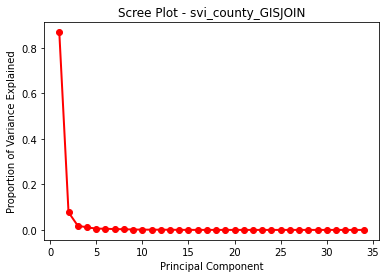

In [34]:
## Scree Plot
## Choice of n
import matplotlib.pyplot as plt

pc_values = np.arange(pca.n_components) + 1
plt.plot(pc_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title(f'Scree Plot - {collection}')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [31]:
variance_df = pd.DataFrame(pca.explained_variance_ratio_*100/pca.explained_variance_ratio_.sum(),
                           index=[f'PC-{str(x)}' for x in range(1, len(features) + 1)],columns=['percentage'],)
variance_df['cum_sum'] = variance_df.cumsum()

In [32]:
variance_df

,percentage,cum_sum
PC-1,86.863635,86.863635
PC-2,7.761644,94.625280
PC-3,1.866266,96.491546
PC-4,1.123966,97.615512
PC-5,0.586209,98.201721
PC-6,0.498186,98.699907
PC-7,0.373957,99.073864
PC-8,0.300554,99.374418
PC-9,0.174176,99.548594
PC-10,0.122846,99.671440
